In [38]:
# Base libraries
import time
import datetime
import os

# Scientific librariesz
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Helper libraries
import xlrd
import pprint
import base64

# Visual setup

# Pandas options
pd.options.display.max_columns = None

## **1. Limpieza De Datos**
---
1. Crear sección de librerias de python
1. Cargar los dataset en la carpeta `1 bronce`
1. Homologar campos en las 3 bases 2019-eficiencia, 2020-eficiencia, 2021, con los campos identificados en el diccionario de datos (identificar las columnas que coinciden en las ters bases)
2. Crear una llave, concatenando el numero de documento con el tipo de documento
3. Teniedo en cuenta la llave del anterior punto, filtrar datos unicos
4. Filtrar para no tener en cuenta los datos nulos  
  * Validar columnas con datos socioeconomicos con valor nulo, con los datos del SISBEN (no tener en cuenta para el 26 de mayo)
5. Crear columna de año den cada base y unirlas (dataset final de trabajo) 

Despues de analizar el diccionario del Anexo 6A del año 2021, se seleccionaron las variables mas relevantes para el desarrollo del proyecto, para ello se creo una columna con el nonbre `COLUMNAS A TENER EN CUENTA` con los valores `SI`, `NO`, `SI SIN VALIDAR SED`, `SI PREGUNTAR SED`.

In [2]:
dic_anexo64_2021 =  pd.read_excel('Diccionario_Anexo6A_31_03_2021_Modificado.xlsx', header=4, index_col=0)
dic_anexo64_2021

,NOMBRE VARIABLE,COLUMNAS A TENER EN CUENTA,ETIQUETA,TIPO DE VARIABLE,LONGITUD,MEDIDA,VALIDACIONES BÁSICAS O VALORES DE LA VARIABLE,VALIDACIONES,DESCRIPCION,OBSERVACIONES
No,,,,,,,,,,
1,ANO_INF,SI,Año de la información,Numérico,4,Nominal,Año al que corresponde la información,NaN,AÑO DE LA INFORMACIÓN,NaN
2,CODIGO_MUN,NO,Municipio o Distrito,Cadena,5,Nominal,Códigos DANE Municipios,"Debe estar acorde con la divipola, se toma el ...",CODIGO DANE DEL MUNICIPIO,"Corresponde al código 001, que en DIVIPOLA cor..."
3,CODIGO_DANE,SI,Código DANE del establecimiento,Numérico,12,Nominal,Código DANE de la institución educativa (12 po...,"Debe estar registrado en el DUE \nen estado ""N...",CODIGO DANE 12 DEL ESTABLECIMIENTO SEDE EDUCATIVA,NaN
4,CODIGO_DANE_SEDE,SI,Código DANE de la Sede,Numérico,12,Nominal,Código DANE que poseía la sede en el año 2001 ...,NaN,CODIGO DANE 12 DE LA SEDE EDUCATIVA,"Debe estar registrado en el DUE \nen estado ""A..."
5,CONS_SEDE,NO,Consecutivo de la sede,Numérico,14,Nominal,Código generado por le DUE para identificar lo...,NaN,CONSECUTIVO DE LA SEDE,NaN
...,...,...,...,...,...,...,...,...,...,...
93,DIR_SECTOR_CENSAL,NaN,Sector censal,Cadena,10,Nominal,NaN,Información del directorio con fecha de corte ...,Sector censal en el directorio,NaN
94,DIR_X,SI,Longitud,Numérico,20,Escala,NaN,Información del directorio con fecha de corte ...,Coordenada X del establecimiento en el directorio,NaN
95,DIR_Y,SI,Latitud,Numérico,20,Escala,NaN,Información del directorio con fecha de corte ...,Coordenada Y del establecimiento en el directorio,NaN


In [3]:
dic_anexo64_2021['COLUMNAS A TENER EN CUENTA'] = dic_anexo64_2021['COLUMNAS A TENER EN CUENTA'].replace(np.nan, 'NO')
main_variables = dic_anexo64_2021[dic_anexo64_2021['COLUMNAS A TENER EN CUENTA'].str.contains('SI', case=False)]['NOMBRE VARIABLE']
main_variables = main_variables.str.strip().tolist()
main_variables

['ANO_INF',
 'CODIGO_DANE',
 'CODIGO_DANE_SEDE',
 'TIPO_DOCUMENTO',
 'NRO_DOCUMENTO',
 'APELLIDO1',
 'APELLIDO2',
 'NOMBRE1',
 'NOMBRE2',
 'DIRECCION_RESIDENCIA',
 'RES_DEPTO',
 'RES_MUN',
 'ESTRATO',
 'SISBEN',
 'FECHA_NACIMIENTO',
 'GENERO',
 'POB_VICT_CONF',
 'DPTO_EXP',
 'MUN_EXP',
 'PROVIENE_SECTOR_PRIV',
 'PROVIENE_OTR_MUN',
 'TIPO_DISCAPACIDAD',
 'CAP_EXC',
 'CODIGO_ETNIA',
 'CODIGO_RESGUARDO',
 'INS_FAMILIAR',
 'CODIGO_JORNADA',
 'CARACTER',
 'CODIGO_ESPECIALIDAD',
 'CODIGO_GRADO',
 'CODIGO_METODOLOGIA',
 'REPITENTE',
 'SIT_ACAD_ANIO_ANT',
 'CON_ALUM_ANIO_ANT',
 'ZONA_RESI_ALU',
 'MADR_CABE_FAMI',
 'HIJO_MADR_CABE_FAMI',
 'BENE_VETE_FUER_PUBL',
 'HERO_NACI',
 'VALORACION1',
 'VALORACION2',
 'CODIGO_INTERNADO',
 'EDAD',
 'NIVEL',
 'NIVEL_B',
 'ETNIA_RECODIFICADA',
 'RANGO_EDAD',
 'CLASE_COLEGIO',
 'PER_ID',
 'PAIS_ORIGEN',
 'NOMBRE_PAIS_ORIGEN',
 'TIPO_NACIONALIDAD',
 'DIR_NUM_LOCALIDAD',
 'DIR_LOCALIDAD',
 'DIR_X',
 'DIR_Y',
 'VICTIMAS_INCLUIDO',
 'VICTIMAS_HECHO']

Se cargan los dataset para cada uno de los años

In [4]:
df_anexo6A_2019 = pd.read_csv('data/1-bronce/Anexo6A_Eficiencia_interna_MEN_2019.csv', delimiter=';')
df_anexo6A_2020 = pd.read_csv('data/1-bronce/Anexo6A_Eficiencia_interna_MEN_2020.csv', delimiter=';')
df_anexo6A_2021 = pd.read_csv('data/1-bronce/Anexo6A_depurado_31032021.csv', delimiter=';')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,49,71,74,76,77,89,92,95,104,105,106,108,115,116) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,49,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (37,45,68,70,79,88,89,90,92,100,102,103,104,105) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Debido a que no en todos los dataset las columnas coinciden, primero miramos cuales son los nombers de columnas que coinciden

In [5]:
dfs = [df_anexo6A_2019, df_anexo6A_2020, df_anexo6A_2021]
dfs_columns = np.concatenate([df.columns.str.strip() for df in dfs])
dfs_columns = pd.Series(dfs_columns).value_counts()
columns_in_all_dfs = dfs_columns[dfs_columns == len(dfs)]
columns_in_all_dfs = columns_in_all_dfs.index
columns_in_all_dfs

Index(['EDAD', 'TIPO_DISCAPACIDAD', 'NOMBRE_PAIS_ORIGEN',
       'DIRECCION_RESIDENCIA', 'SISBEN', 'CONS_SEDE', 'NAC_MUN', 'DPTO_EXP',
       'EXP_MUN', 'TEL', 'NUEVO', 'NOMBRE2', 'POB_VICT_CONF', 'NRO_DOCUMENTO',
       'APELLIDO1', 'NOMBRE1', 'PROVIENE_SECTOR_PRIV', 'MUN_EXP',
       'FECHA_NACIMIENTO', 'RES_DEPTO', 'CAP_EXC', 'CARACTER', 'APELLIDO2',
       'ESTRATO', 'EXP_DEPTO', 'TIPO_DOCUMENTO', 'NIVEL', 'GRUPO', 'REPITENTE',
       'NAC_DEPTO', 'RES_MUN'],
      dtype='object')

In [6]:
missing_main_variables = list(filter(lambda x: x not in columns_in_all_dfs, main_variables))
missing_main_variables

['ANO_INF',
 'CODIGO_DANE',
 'CODIGO_DANE_SEDE',
 'GENERO',
 'PROVIENE_OTR_MUN',
 'CODIGO_ETNIA',
 'CODIGO_RESGUARDO',
 'INS_FAMILIAR',
 'CODIGO_JORNADA',
 'CODIGO_ESPECIALIDAD',
 'CODIGO_GRADO',
 'CODIGO_METODOLOGIA',
 'SIT_ACAD_ANIO_ANT',
 'CON_ALUM_ANIO_ANT',
 'ZONA_RESI_ALU',
 'MADR_CABE_FAMI',
 'HIJO_MADR_CABE_FAMI',
 'BENE_VETE_FUER_PUBL',
 'HERO_NACI',
 'VALORACION1',
 'VALORACION2',
 'CODIGO_INTERNADO',
 'NIVEL_B',
 'ETNIA_RECODIFICADA',
 'RANGO_EDAD',
 'CLASE_COLEGIO',
 'PER_ID',
 'PAIS_ORIGEN',
 'TIPO_NACIONALIDAD',
 'DIR_NUM_LOCALIDAD',
 'DIR_LOCALIDAD',
 'DIR_X',
 'DIR_Y',
 'VICTIMAS_INCLUIDO',
 'VICTIMAS_HECHO']

Debido a que se esta utilizando una gran cantidad de columnas, se necesita una funcion que encuntre coincidencias en los nombres de las otras columnas en los otros dataframes, con respecto a las columnas que definimos como importantes

In [7]:
def word_in_dfs_columns(dfs_dic, word, to_ignore=[]):
    words = word.split('_')
    words = list(filter(lambda x: x not in to_ignore, words))
    results = {}
    for key, df in dfs_dic.items():
        matches = []
        for w in words:
            matches = [*matches, *df.columns[df.columns.str.contains(w, case=False)]]
            matches = list(set(matches))
        
        results[key] = matches
    return results

In [8]:
df_dict = {'df_anexo6A_2019':df_anexo6A_2019, 'df_anexo6A_2020':df_anexo6A_2020}
variables = {}
for var in missing_main_variables:
    variables[var] = word_in_dfs_columns(df_dict, var, ['CODIGO', 'DIR', 'TIPO', 'B', 'ID'])
pprint.pprint(variables)

{'ANO_INF': {'df_anexo6A_2019': ['SIT_ACAD_ANO_ANT',
                                 'CON_ALUM_ANO_ANT',
                                 'ANNO_INF'],
             'df_anexo6A_2020': ['SIT_ACAD_ANO_ANT',
                                 'CON_ALUM_ANO_ANT',
                                 'ANNO_INF']},
 'BENE_VETE_FUER_PUBL': {'df_anexo6A_2019': [], 'df_anexo6A_2020': []},
 'CLASE_COLEGIO': {'df_anexo6A_2019': ['CLASE',
                                       'RECTORCOLEGIOSDISTRITALESACTUALIZACIONA18JUL2019',
                                       'DIRECCION2COMUNREPORTECOLEGIOS'],
                   'df_anexo6A_2020': ['CLASE_DIR']},
 'CODIGO_DANE': {'df_anexo6A_2019': ['DANE12_SEDE_EDUCATIVA',
                                     'DANE12_ESTABLECIMIENTO_EDUCATIVO',
                                     'DANE11_SEDE_EDUCATIVA',
                                     'DANE11_ESTABLECIMIENTO_EDUCATIVO'],
                 'df_anexo6A_2020': ['DANE12_SEDE_EDUCATIVA',
                       

In [9]:
word_in_dfs_columns(df_dict, 'LOC', ['CODIGO', 'DIR', 'TIPO', 'B', 'ID'])

{'df_anexo6A_2019': ['NOMBRE_LOCALIDAD', '@#_LOC'],
 'df_anexo6A_2020': ['LOC_DIR', 'NOMBRE_LOCALIDAD_DIR']}

Despues de analizar el resultado de nuestra funcion que encuentra coincidencias, creamos el sigueinte dicionario replace_columns_dict con los nombres de columnas a remplazr en los otros datasets

In [10]:
replace_columns_dict = {
    'ANNO_INF': 'ANO_INF',
    'DANE12_ESTABLECIMIENTO_EDUCATIVO': 'CODIGO_DANE',
    'DANE12_SEDE_EDUCATIVA': 'CODIGO_DANE_SEDE',
    'ESPECIALIDAD': 'CODIGO_ESPECIALIDAD',
    'ETNIA': 'CODIGO_ETNIA',
    'GRADO': 'CODIGO_GRADO',
    'INTERNADO': 'CODIGO_INTERNADO',
    'TIPO_JORNADA': 'CODIGO_JORNADA',
    'METODOLOGIA': 'CODIGO_METODOLOGIA',
    'CON_ALUM_ANO_ANT': 'CON_ALUM_ANIO_ANT',
    'GENERO.x': 'GENERO',
    'CODIGO_PAIS_ORIGEN': 'PAIS_ORIGEN',
    'PROVIENE_OTRO_MUN': 'PROVIENE_OTR_MUN',
    'SIT_ACAD_ANO_ANT': 'SIT_ACAD_ANIO_ANT',
    'VAL_DES_PERIODO1': 'VALORACION1',
    'VAL_DES_PERIODO2': 'VALORACION2',
    'NUMERO_LOCALIDAD': 'DIR_NUM_LOCALIDAD',
    '@_LOC': 'DIR_NUM_LOCALIDAD',
    '@#_LOC': 'DIR_NUM_LOCALIDAD',
    'LOC_DIR': 'DIR_NUM_LOCALIDAD',
    'LOCALIDAD': 'DIR_LOCALIDAD',
    'NOMBRE_LOCALIDAD': 'DIR_LOCALIDAD',
    'NOMBRE_LOCALIDAD_DIR': 'DIR_LOCALIDAD' 
}

La siguiente celda muestra como se relacionan las cada una de las coincidiencias definidas arriba, una pequeña muestra de los valores que tienen y el tipo
```
<replace_columns_dict_key> <replace_columns_dict_value>--> [values examples of dataframe 1] [values examples of dataframe 2] [values examples of dataframe 3]
types: [type of dataframe 1, type of dataframe 2, type of dataframe 3] 
```

In [11]:
text =""
for key, val in replace_columns_dict.items():
    text += f"{key}  {val}--> "
    var_types = []
    for df in dfs:
        
        if key in df.columns:
            text += f"{df[key].unique()[:5]}"
            var_types.append(df[key].dtype)
        elif val in df.columns:
            text += f"{df[val].unique()[:5]}"
            var_types.append(df[val].dtype)
        else:
            text += "(not found)"
            var_types.append("(not found)")
    text += f"\ntypes: {var_types} \n\n"   
print(text)

ANNO_INF  ANO_INF--> [2019][2020][2021]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

DANE12_ESTABLECIMIENTO_EDUCATIVO  CODIGO_DANE--> [211850001473 311001090793 111001035572 111001012475 111001029955][111001000078 111001000124 111001000132 111001000272 111001000612][111001000078 111001000124 111001000132 111001000272 111001000612]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

DANE12_SEDE_EDUCATIVA  CODIGO_DANE_SEDE--> [211850000817 211001030630 311001090793 111001035572 111001013625][111001000078 111001014834 111001014842 111001000124 111001014303][111001000078 111001014834 111001014842 111001000124 111001000132]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

ESPECIALIDAD  CODIGO_ESPECIALIDAD--> [0 7 5 6 8][5 0 6 8 7][5 0 6 8 9]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

ETNIA  CODIGO_ETNIA--> [  0 200  27  83  46][  0  97 200   1   2][  0 200   1  97  83]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

GRADO  CODIGO_GRADO-->

Filtramos las variables que no se pudieron encontrar en todos los dataframes, incluso despues de hacer el checkeo manual.

In [12]:
unfindables_variables = list(filter(lambda x: x not in replace_columns_dict.values(), missing_main_variables))
unfindables_variables

['CODIGO_RESGUARDO',
 'INS_FAMILIAR',
 'ZONA_RESI_ALU',
 'MADR_CABE_FAMI',
 'HIJO_MADR_CABE_FAMI',
 'BENE_VETE_FUER_PUBL',
 'HERO_NACI',
 'NIVEL_B',
 'ETNIA_RECODIFICADA',
 'RANGO_EDAD',
 'CLASE_COLEGIO',
 'PER_ID',
 'TIPO_NACIONALIDAD',
 'DIR_X',
 'DIR_Y',
 'VICTIMAS_INCLUIDO',
 'VICTIMAS_HECHO']

Ahora filtramos las variables que  vamos a utilizar y las asignamos a una lista en la variable `validate_main_variables` 

In [13]:
validate_main_variables = list(filter(lambda x: x not in unfindables_variables, main_variables))
validate_main_variables

['ANO_INF',
 'CODIGO_DANE',
 'CODIGO_DANE_SEDE',
 'TIPO_DOCUMENTO',
 'NRO_DOCUMENTO',
 'APELLIDO1',
 'APELLIDO2',
 'NOMBRE1',
 'NOMBRE2',
 'DIRECCION_RESIDENCIA',
 'RES_DEPTO',
 'RES_MUN',
 'ESTRATO',
 'SISBEN',
 'FECHA_NACIMIENTO',
 'GENERO',
 'POB_VICT_CONF',
 'DPTO_EXP',
 'MUN_EXP',
 'PROVIENE_SECTOR_PRIV',
 'PROVIENE_OTR_MUN',
 'TIPO_DISCAPACIDAD',
 'CAP_EXC',
 'CODIGO_ETNIA',
 'CODIGO_JORNADA',
 'CARACTER',
 'CODIGO_ESPECIALIDAD',
 'CODIGO_GRADO',
 'CODIGO_METODOLOGIA',
 'REPITENTE',
 'SIT_ACAD_ANIO_ANT',
 'CON_ALUM_ANIO_ANT',
 'VALORACION1',
 'VALORACION2',
 'CODIGO_INTERNADO',
 'EDAD',
 'NIVEL',
 'PAIS_ORIGEN',
 'NOMBRE_PAIS_ORIGEN',
 'DIR_NUM_LOCALIDAD',
 'DIR_LOCALIDAD']

In [14]:
len(validate_main_variables)

41

Remplazamos los nombres de las columnas que encontramos pero que no coinciden en el resto de los dataframes.

In [15]:
for df in dfs:
    df.rename(columns=replace_columns_dict, inplace=True)

Despues de remplazar los nombres de las columnas, tomamos solos las que necesitamos 

In [16]:
df_anexo6A_2019 = df_anexo6A_2019[validate_main_variables]
df_anexo6A_2020 = df_anexo6A_2020[validate_main_variables]
df_anexo6A_2021 = df_anexo6A_2021[validate_main_variables]

Igual que como se hizo anteriormente miramos las variables, una pequeña muestra de los valores que tienen y el tipo de estas
```
<dataframe_column> --> [values examples of dataframe 1] [values examples of dataframe 2] [values examples of dataframe 3]
types: [type of dataframe column 1, type of dataframe column 2, type of dataframe column 3] 
```

In [17]:
text =""
for col in validate_main_variables:
    text += f"{col} --> "
    var_types = []
    for df in dfs:
        text += f"{df[col].unique()[:5]}"
        var_types.append(df[col].dtype)
    text += f"\ntypes: {var_types} \n\n"   
print(text)

ANO_INF --> [2019][2020][2021]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

CODIGO_DANE --> [211850001473 311001090793 111001035572 111001012475 111001029955][111001000078 111001000124 111001000132 111001000272 111001000612][111001000078 111001000124 111001000132 111001000272 111001000612]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

CODIGO_DANE_SEDE --> [211850000817 211001030630 311001090793 111001035572 111001013625][111001000078 111001014834 111001014842 111001000124 111001014303][111001000078 111001014834 111001014842 111001000124 111001000132]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

TIPO_DOCUMENTO --> [2 5 7 1 6][ 2  7  1  5 10][5 2 7 1 8]
types: [dtype('int64'), dtype('int64'), dtype('int64')] 

NRO_DOCUMENTO --> ['1110088001' '1023380879' '1022962679' '1141328312' '1011214345']['1004074564' '1005852136' '1006354640' '1030522200' '1059983157']['1074808146' '1105780097' '1000747239' '1070467145' '1069475204']
types: [dtype('O'), dtype('

Checkeamos si existen duplicados en los dataframe, por ejemplo para número de documento

In [18]:
df_anexo6A_2019[df_anexo6A_2019.duplicated(subset=['NRO_DOCUMENTO'], keep=False)].sort_values(by='NRO_DOCUMENTO')

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,DPTO_EXP,MUN_EXP,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,VALORACION1,VALORACION2,CODIGO_INTERNADO,EDAD,NIVEL,PAIS_ORIGEN,NOMBRE_PAIS_ORIGEN,DIR_NUM_LOCALIDAD,DIR_LOCALIDAD
145657,2019,111001102130,111001034754,2,1000353051,MONTERO,REYES,NIKOL,YULIANA,CL 70 B 18 C 40 SUR,11,1,1,,12/17/2002,F,99,,,N,N,99,9,0,3,1,5,10,1,N,1,9,,,3,16,4,170,COLOMBIA,19,CIUDAD BOLIVAR
421945,2019,111001027251,111001027251,5,1000353051,MONTERO,REYES,NIKOL,YULIANA,CL 70 B 18 C 40,11,1,1,.01,12/17/2003,F,99,,,N,N,99,9,0,3,1,5,10,1,N,1,9,,,3,15,4,,$null$,19,CIUDAD BOLIVAR
592790,2019,111001109550,111001109550,5,1000381150,MARIN,ARIAS,JUAN,PABLO,CR 102 # 83 - 60 INT 4 APTO 507,11,1,3,.01,9/13/2002,M,99,,,N,N,99,9,0,2,1,5,11,1,N,1,9,,,3,16,4,,$null$,10,ENGATIVA
45909,2019,111265000343,111265000343,2,1000381150,CASTRO,GUZMAN,JAIDER,JULIAN,CORREG LA CHAPARRERA,85,1,2,,9/20/2002,M,99,,,N,N,99,9,0,2,0,0,9,1,N,1,9,,,3,16,3,,$null$,10,ENGATIVA
128513,2019,111001107875,111001107875,7,1000381249,SALGADO,SANCHEZ,CRISTIAN,CAMILO,CL 72 A 87 J BIS 87 CL 72 A SUR 87 J17,11,1,2,1,12/11/2001,M,99,,,N,N,99,9,0,3,0,0,9,1,N,1,9,,,3,17,3,170,COLOMBIA,7,BOSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518908,2019,111001013676,111001800279,5,1206216241,SANDOVAL,BERMUDEZ,DEIVY,SANTIAGO,CL 54 B 72 F 23 SUR,11,1,2,,4/15/2012,M,99,,,S,N,99,9,0,2,0,0,1,1,N,1,9,,,3,6,2,,$null$,7,BOSA
181873,2019,111001012530,111001012165,12,32153167,GOMEZ,LUZARDO,GABRIEL,ALEJANDRO,KR 41 2 F 18,11,1,3,,6/7/2007,M,99,,,N,N,99,9,0,3,0,0,5,1,N,0,9,,,3,11,2,862,VENEZUELA,16,PUENTE ARANDA
41116,2019,111001036544,111001036544,3,32153167,GOMEZ,LUZARDO,GABARIEL,ALEJANDRO,KR 8 6 34,11,1,2,,6/7/2007,M,99,,,N,N,99,9,0,6,0,0,4,1,N,1,9,,,3,11,2,862,VENEZUELA,3,SANTAFE
245648,2019,111102000621,111102000621,3,32828025,LINARES,MUJICA,MARIAN,DALEXIS,KR 85 64 68,11,1,2,,4/9/2007,F,99,,,N,N,99,9,0,3,0,0,5,1,N,0,9,,,3,11,2,862,VENEZUELA,7,BOSA


In [19]:
df_anexo6A_2020[df_anexo6A_2020.duplicated(subset=['NRO_DOCUMENTO'], keep=False)].sort_values(by='NRO_DOCUMENTO')

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,DPTO_EXP,MUN_EXP,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,VALORACION1,VALORACION2,CODIGO_INTERNADO,EDAD,NIVEL,PAIS_ORIGEN,NOMBRE_PAIS_ORIGEN,DIR_NUM_LOCALIDAD,DIR_LOCALIDAD
559,2020,111001000078,111001000078,8,,AYALA,GUERRERO,JHOAN,CAMILO,CL 17 SUR 50 45,11,1,3,,1/3/2007,M,99,,,N,N,8,9,0,6,0,0,7,1,N,1,9,,,3,13,3,218,ECUADOR,16,PUENTE ARANDA
436572,2020,111001086835,111001044423,8,,SANCHEZ,RAMIREZ,AMBARLY,WILKERLY,CL 82 B SUR 65 07,11,1,0,,6/27/2012,F,18,,,N,N,99,9,0,2,0,0,2,1,N,8,8,,,3,7,2,862,VENEZUELA,19,CIUDAD BOLIVAR
436570,2020,111001086835,111001044423,8,,MASEA,HOYOS,JUAN,MANUEL,KR 45 B 72 25 SUR,11,1,1,,11/16/2010,M,99,,,N,N,99,9,0,3,0,0,2,1,N,0,9,,,3,9,2,862,VENEZUELA,19,CIUDAD BOLIVAR
436568,2020,111001086835,111001044423,8,,REINOSO,NARVAEZ,DULIANGELY,JOSELIN,CL 77 73 G 22 SUR,11,1,1,,10/3/2011,F,99,,,N,N,99,9,0,2,0,0,2,1,N,0,9,,,3,8,2,862,VENEZUELA,19,CIUDAD BOLIVAR
436566,2020,111001086835,111001044423,8,,ZUÑIGA,PINEDA,FREYNHER,JUNIOR,CL 60 46 B 53 SUR,11,1,1,,12/31/2013,M,99,,,N,N,99,9,0,3,0,0,1,1,N,0,9,,,3,6,2,862,VENEZUELA,19,CIUDAD BOLIVAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176465,2020,111001015598,111001015598,3,14032010,GARCIA,RAMIREZ,JERUZKA,VALENTINA,KR 78 A 47 3 SUR,11,1,2,,3/14/2010,F,99,,,N,N,99,9,0,2,0,0,4,1,N,1,9,,,3,10,2,,$null$,8,KENNEDY
383278,2020,111001075663,111001104230,3,19282795,BORREGALES,DORIA,JOHANNERIS,ELIZABETH,KR 18 G 5 07 SUR,11,1,1,,1/31/2010,F,99,,,N,N,99,9,0,3,0,0,4,1,N,1,9,,,3,10,2,862,VENEZUELA,19,CIUDAD BOLIVAR
382667,2020,111001075663,111001075663,3,19282795,BORREGALES,DORIA,SAMUEL,DAVID,KR 18 5 107 SUR,11,1,1,,7/7/2011,M,99,,,N,N,99,9,0,3,0,0,3,1,N,1,9,,,3,8,2,862,VENEZUELA,19,CIUDAD BOLIVAR
146327,2020,111001014206,111001014206,2,96081510099,GARZON,CHAPARRO,MARIA,FERNANDA,DG 49 19 31 SUR,11,1,2,,8/4/1996,F,99,,,N,N,99,9,0,3,0,0,7,1,N,1,9,,,3,23,3,170,COLOMBIA,6,TUNJUELITO


Miramos cuántos estudiantes faltan o no registrar ningún documento

In [20]:
df_anexo6A_2020[df_anexo6A_2020['NRO_DOCUMENTO'] == ' '].shape[0]

34253

In [21]:
df_anexo6A_2021[df_anexo6A_2021.duplicated(subset=['NRO_DOCUMENTO'], keep=False)].sort_values(by='NRO_DOCUMENTO')

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,DPTO_EXP,MUN_EXP,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,VALORACION1,VALORACION2,CODIGO_INTERNADO,EDAD,NIVEL,PAIS_ORIGEN,NOMBRE_PAIS_ORIGEN,DIR_NUM_LOCALIDAD,DIR_LOCALIDAD
140564,2021,111001013374,111001013374,5,1021312334,RODRIGUEZ,ORTEGA,EDGAR,MANUEL,CL 4 A 3 04,11,1,2,"41,79",3/8/2005,M,99,,,N,N,99,9,0,3,0,0,7,1,N,1,9,,,3,16,3,996,NO ESPECIFICADO,17,17
211282,2021,111001016071,111001016071,2,1021312334,BUENAVENTURA,ROZO,LUNA,CAMILA,CL 7 90 61,73,1,2,"36,71",4/21/2004,F,99,,,N,S,99,9,0,3,1,5,10,1,N,1,9,,,3,17,4,996,NO ESPECIFICADO,8,8
204636,2021,111001015903,111001015938,7,1023916896,LAVERDE,CUESTAS,WEINER,SANTIAGO,KR 5 ESTE 30 78,11,1,2,"18,14",7/11/2009,M,99,,,N,N,99,9,0,2,0,0,0,1,N,1,9,,,3,11,1,996,NO ESPECIFICADO,4,4
326029,2021,111001032280,111001012416,5,1023916896,LAVERDE,CUESTAS,WEINER,SANTIAGO,CR 5 ESTE # 31 SUR - 29,11,1,2,"18,14",4/28/2010,M,99,,,S,N,99,9,0,6,0,0,5,1,N,1,9,,,3,11,2,996,NO ESPECIFICADO,4,4
98979,2021,111001012271,111001012271,7,1028787575,HERNANDEZ,ALGARRA,EILEEN,VALENTINA,CL 49 A SUR # 38 - 65,11,1,2,"13,17",9/22/2010,F,99,,,N,N,99,9,0,2,0,0,99,9,S,8,8,,,3,10,2,996,NO ESPECIFICADO,6,6
99678,2021,111001012271,111001012271,5,1028787575,HERNANDEZ,ALGARRA,VALERY,JOHANNA,KR 27 47 B 15,11,1,1,0,7/27/2010,F,99,,,N,N,99,9,0,2,0,0,99,9,N,0,9,,,3,10,2,170,COLOMBIA,6,6
2495,2021,111001000124,111001000124,2,1028882138,ESCARRAGA,BUSTOS,ERIKA,DAYANNA,CL 37 F 68 F 16 SUR,11,1,1,1,4/13/2006,F,1,13,744,N,N,99,9,0,2,0,0,9,1,N,1,9,,,3,15,3,170,COLOMBIA,8,8
213684,2021,111001016098,111001016098,7,1028882138,ESCARRAGA,BUSTOS,ERIKA,DAYANNA,CL 38 # 68 - 38,11,1,0,"55,07",3/29/2006,F,99,,,N,N,99,9,0,3,0,0,9,1,N,1,9,,,3,15,3,996,NO ESPECIFICADO,8,8
314594,2021,111001030821,111001075302,2,1029287207,MONTOYA,PINEDA,AHSLY,NATALY,CL 67 34 56,11,1,1,0,7/30/2014,F,99,,,N,N,99,9,0,3,0,0,1,1,N,1,9,,,3,6,2,170,COLOMBIA,19,19
436357,2021,111001076937,111001075213,5,1029287207,RAMOS,CELEITA,JACKSON,SNEIDER,DG 64 BIS 19 B 24 SUR,11,1,2,0,9/20/2011,M,99,,,N,N,99,9,0,3,0,0,99,9,N,1,9,,,3,9,2,996,NO ESPECIFICADO,19,19


In [22]:
df_anexo6A_2019.drop_duplicates(subset=['NRO_DOCUMENTO'], keep=False, inplace=True)
df_anexo6A_2020.drop_duplicates(subset=['NRO_DOCUMENTO'], keep=False, inplace=True)
df_anexo6A_2021.drop_duplicates(subset=['NRO_DOCUMENTO'], keep=False, inplace=True)

<ipython-input-22-de8ce5b925b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anexo6A_2019.drop_duplicates(subset=['NRO_DOCUMENTO'], keep=False, inplace=True)
<ipython-input-22-de8ce5b925b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anexo6A_2020.drop_duplicates(subset=['NRO_DOCUMENTO'], keep=False, inplace=True)
<ipython-input-22-de8ce5b925b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anexo6A_2021.drop_duplica

In [23]:
df_anexo6A_2019['ID_ESTUDIANTE'] = df_anexo6A_2019[['TIPO_DOCUMENTO', 'NRO_DOCUMENTO']].apply(lambda x: ':'.join([str(x['TIPO_DOCUMENTO']), str(x['NRO_DOCUMENTO'])]), axis=1)
df_anexo6A_2019['ID_ESTUDIANTE'] = df_anexo6A_2019['ID_ESTUDIANTE'].apply(lambda x: base64.b64encode(x.encode()).decode()) 

df_anexo6A_2020['ID_ESTUDIANTE'] = df_anexo6A_2020[['TIPO_DOCUMENTO', 'NRO_DOCUMENTO']].apply(lambda x: ':'.join([str(x['TIPO_DOCUMENTO']), str(x['NRO_DOCUMENTO'])]), axis=1)
df_anexo6A_2020['ID_ESTUDIANTE'] = df_anexo6A_2020['ID_ESTUDIANTE'].apply(lambda x: base64.b64encode(x.encode()).decode())  

df_anexo6A_2021['ID_ESTUDIANTE'] = df_anexo6A_2021[['TIPO_DOCUMENTO', 'NRO_DOCUMENTO']].apply(lambda x: ':'.join([str(x['TIPO_DOCUMENTO']), str(x['NRO_DOCUMENTO'])]), axis=1)
df_anexo6A_2021['ID_ESTUDIANTE'] = df_anexo6A_2021['ID_ESTUDIANTE'].apply(lambda x: base64.b64encode(x.encode()).decode())  

<ipython-input-23-e82a6d32ba71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anexo6A_2019['ID_ESTUDIANTE'] = df_anexo6A_2019[['TIPO_DOCUMENTO', 'NRO_DOCUMENTO']].apply(lambda x: ':'.join([str(x['TIPO_DOCUMENTO']), str(x['NRO_DOCUMENTO'])]), axis=1)
<ipython-input-23-e82a6d32ba71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anexo6A_2019['ID_ESTUDIANTE'] = df_anexo6A_2019['ID_ESTUDIANTE'].apply(lambda x: base64.b64encode(x.encode()).decode())
<ipython-input-23-e82a6d32ba71>:4: SettingWithCopyWa

In [24]:
df_anexo6A = pd.concat([df_anexo6A_2019, df_anexo6A_2020, df_anexo6A_2021], ignore_index=True)
df_anexo6A

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,DPTO_EXP,MUN_EXP,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,VALORACION1,VALORACION2,CODIGO_INTERNADO,EDAD,NIVEL,PAIS_ORIGEN,NOMBRE_PAIS_ORIGEN,DIR_NUM_LOCALIDAD,DIR_LOCALIDAD,ID_ESTUDIANTE
0,2019,211850001473,211850000817,2,1110088001,PEÑA,GIRALDO,BREYNER,ANDRES,VDA PALOMAR,73,43,1,,4/14/2008,M,99,,,N,N,99,9,0,6,0,0,5,1,N,1,9,,,3,10,2,170,COLOMBIA,20,SUMAPAZ,MjoxMTEwMDg4MDAx
1,2019,211850001473,211850000817,2,1023380879,GUEVARA,SUSA,HAROL,FARID,CG SAN JUAN DE SUMAPAZ KM 100,11,1,1,,8/11/2008,M,99,,,N,N,99,9,0,6,0,0,5,1,N,1,9,,,3,10,2,,$null$,20,SUMAPAZ,MjoxMDIzMzgwODc5
2,2019,211850001473,211850000817,2,1022962679,BAQUERO,CHAVARRO,LISED,DAYANA,VEREDA LA MACARENA,25,740,1,,8/24/2008,F,99,,,N,N,99,9,0,6,0,0,4,1,N,1,9,,,3,10,2,170,COLOMBIA,20,SUMAPAZ,MjoxMDIyOTYyNjc5
3,2019,211850001473,211850000817,2,1141328312,QUITIAN,PEÑALOZA,JAMES,ESNEIDER,VR SUMAPAZ SAN JUAN KM 10,11,1,1,16.,7/17/2009,M,99,,,N,N,99,9,0,6,0,0,4,1,N,1,9,,,3,9,2,170,COLOMBIA,20,SUMAPAZ,MjoxMTQxMzI4MzEy
4,2019,211850001473,211850000817,5,1011214345,TOVAR,PARRA,ANDERSON,,CR 7 # 80 A SUR - 19,11,1,0,,8/25/2011,M,99,,,N,N,99,9,0,6,0,0,2,1,N,1,9,,,3,7,2,,$null$,20,SUMAPAZ,NToxMDExMjE0MzQ1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226659,2021,411102000293,411102000293,2,1012336508,REBELLON,TORRES,DAYANA,SULEY,KR 105 B 65 81 SUR,11,1,2,"54,68",9/6/2005,F,99,,,N,N,99,9,0,6,2,7,10,1,N,1,9,,,3,15,4,170,COLOMBIA,7,7,MjoxMDEyMzM2NTA4
2226660,2021,411102000293,411102000293,2,1016713910,CARRILLO,TORRES,ASLHEY,DAYANNA,KR 99 A 71 39 SUR,11,1,2,"61,21",10/1/2005,F,99,,,N,N,99,9,0,6,2,7,10,1,N,1,9,,,3,15,4,170,COLOMBIA,7,7,MjoxMDE2NzEzOTEw
2226661,2021,411102000293,411102000293,2,1011090034,PEREZ,CUERVO,KAROLL,MICHELLE,CL 62 SUR 93 C 53,11,1,2,"58,21",11/30/2005,F,99,,,N,N,99,9,0,6,2,7,10,1,N,1,9,,,3,15,4,170,COLOMBIA,7,7,MjoxMDExMDkwMDM0
2226662,2021,411102000293,411102000293,2,1011092068,MORALES,RODRIGUEZ,VALERIA,,CL 61 B SUR 81 D 03,11,1,2,"58,24",2/24/2006,F,99,,,N,N,99,9,0,6,2,7,10,1,N,1,9,,,3,15,4,170,COLOMBIA,7,7,MjoxMDExMDkyMDY4


In [25]:
for col in df_anexo6A.columns:
    text =""
    text += f"{col} --> "    
    text += f"{df_anexo6A[col].unique()[:]}"
    var_type = df_anexo6A[col].dtype
    text += f"\ntypes: {var_type} \n\n"   
    print(text)

ANO_INF --> [2019 2020 2021]
types: int64 


CODIGO_DANE --> [211850001473 311001090793 111001035572 111001012475 111001029955
 111001025020 111001102016 111001015172 111001030864 111001018058
 111001106950 111001086649 111001104299 111001027383 111850001428
 111001016098 111001014168 111001093084 111001011274 111769001502
 111001015733 111001107859 111001014745 111001036544 111001006483
 111279000061 111265000343 111001000132 111001047571 111001030848
 111001100064 311769001030 111001046931 111279001296 111001012602
 111001018309 111001102067 111001098892 111001032450 111001800457
 111001098949 111001104035 211102000995 111001014109 111001077917
 111001012611 211850000931 111001100013 211001076346 111001102156
 311001075034 111001104272 111001002909 111001000124 111001011321
 111001104329 111001076767 111001086801 111001044385 111001010031
 111001009652 111001108901 111001086614 111001098850 111001096555
 111001014214 111001028266 211001094832 111001107875 311102000141
 111001013129 1

 campos ' ': `SISBEN`, `DPTO_EXP, MUN_EXP`, `VALORACION1`, `VALORACION2`, `CODIGO_INTERNADO`, `PAIS_ORIGEN`  
campos '\$null\$': `NOMBRE_PAIS_ORIGEN` 

In [26]:
empty_columns = ['SISBEN', 'DPTO_EXP', 'MUN_EXP', 'VALORACION1', 'VALORACION2', 'CODIGO_INTERNADO', 'PAIS_ORIGEN']
null_columns = ['NOMBRE_PAIS_ORIGEN']

In [27]:
for col in empty_columns:
  print(f"Empties in {col} --> {df_anexo6A[df_anexo6A[col] == ' '][col].value_counts()[0]}")

Empties in SISBEN --> 699622
Empties in DPTO_EXP --> 2156194
Empties in MUN_EXP --> 2156194
Empties in VALORACION1 --> 2226394
Empties in VALORACION2 --> 2226659
Empties in CODIGO_INTERNADO --> 128882
Empties in PAIS_ORIGEN --> 810846


`DPTO_EXP` 2156194 vacios pero no todos los estudiantes son expulsados como victimas de conflicto  
`MUN_EXP ` 2156194 vacios pero no todos los estudiantes son expulsados como victimas de conflicto
`VALORACION1` y `VALORACION2` contiene muchos vacios, pero despues de ralizar un conteo en la base del 2019 donde se encuentran 27099 repitentes, solo 4 cuentan con el dato de valoracion, en este caso no tendriamos en cuneta estas variables para el análisis

In [28]:
for col in null_columns:
  print(f"$null$'s in {col} --> {df_anexo6A[df_anexo6A[col] == '$null$'][col].value_counts()[0]}")

$null$'s in NOMBRE_PAIS_ORIGEN --> 810846


In [29]:
mixed_types_columns = ['CODIGO_INTERNADO', 'PAIS_ORIGEN']
for col in mixed_types_columns:
  df_anexo6A[col].astype(str)

df_anexo6A.head()

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,DPTO_EXP,MUN_EXP,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,VALORACION1,VALORACION2,CODIGO_INTERNADO,EDAD,NIVEL,PAIS_ORIGEN,NOMBRE_PAIS_ORIGEN,DIR_NUM_LOCALIDAD,DIR_LOCALIDAD,ID_ESTUDIANTE
0,2019,211850001473,211850000817,2,1110088001,PEÑA,GIRALDO,BREYNER,ANDRES,VDA PALOMAR,73,43,1,,4/14/2008,M,99,,,N,N,99,9,0,6,0,0,5,1,N,1,9,,,3,10,2,170,COLOMBIA,20,SUMAPAZ,MjoxMTEwMDg4MDAx
1,2019,211850001473,211850000817,2,1023380879,GUEVARA,SUSA,HAROL,FARID,CG SAN JUAN DE SUMAPAZ KM 100,11,1,1,,8/11/2008,M,99,,,N,N,99,9,0,6,0,0,5,1,N,1,9,,,3,10,2,,$null$,20,SUMAPAZ,MjoxMDIzMzgwODc5
2,2019,211850001473,211850000817,2,1022962679,BAQUERO,CHAVARRO,LISED,DAYANA,VEREDA LA MACARENA,25,740,1,,8/24/2008,F,99,,,N,N,99,9,0,6,0,0,4,1,N,1,9,,,3,10,2,170,COLOMBIA,20,SUMAPAZ,MjoxMDIyOTYyNjc5
3,2019,211850001473,211850000817,2,1141328312,QUITIAN,PEÑALOZA,JAMES,ESNEIDER,VR SUMAPAZ SAN JUAN KM 10,11,1,1,16.,7/17/2009,M,99,,,N,N,99,9,0,6,0,0,4,1,N,1,9,,,3,9,2,170,COLOMBIA,20,SUMAPAZ,MjoxMTQxMzI4MzEy
4,2019,211850001473,211850000817,5,1011214345,TOVAR,PARRA,ANDERSON,,CR 7 # 80 A SUR - 19,11,1,0,,8/25/2011,M,99,,,N,N,99,9,0,6,0,0,2,1,N,1,9,,,3,7,2,,$null$,20,SUMAPAZ,NToxMDExMjE0MzQ1


In [30]:
df_anexo6A['APELLIDO1'] = df_anexo6A['APELLIDO1'].astype(str)
df_anexo6A['EDAD'] = df_anexo6A['EDAD'].astype(int)
df_anexo6A['NOMBRE_PAIS_ORIGEN'] = df_anexo6A['NOMBRE_PAIS_ORIGEN'].astype(str)

In [31]:
df_anexo6A.to_csv('data/2-plata/Anexo6A-preliminar.csv')

## **2. Resumen estadistico de las variables**
---
1. Usar `.describe()` para el dataset consolidado

1. Let´s start by describing the relevant variables in the **df_anexo6A_2019** dataset

In [32]:
df_anexo6A = pd.read_csv('data/2-plata/Anexo6A-preliminar.csv', index_col=0)
df_anexo6A.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,35,38,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/conda/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,DPTO_EXP,MUN_EXP,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,VALORACION1,VALORACION2,CODIGO_INTERNADO,EDAD,NIVEL,PAIS_ORIGEN,NOMBRE_PAIS_ORIGEN,DIR_NUM_LOCALIDAD,DIR_LOCALIDAD,ID_ESTUDIANTE
0,2019,211850001473,211850000817,2,1110088001,PEÑA,GIRALDO,BREYNER,ANDRES,VDA PALOMAR,73,43,1,,4/14/2008,M,99,,,N,N,99,9,0,6,0,0,5,1,N,1,9,,,3,10,2,170,COLOMBIA,20,SUMAPAZ,MjoxMTEwMDg4MDAx
1,2019,211850001473,211850000817,2,1023380879,GUEVARA,SUSA,HAROL,FARID,CG SAN JUAN DE SUMAPAZ KM 100,11,1,1,,8/11/2008,M,99,,,N,N,99,9,0,6,0,0,5,1,N,1,9,,,3,10,2,,$null$,20,SUMAPAZ,MjoxMDIzMzgwODc5
2,2019,211850001473,211850000817,2,1022962679,BAQUERO,CHAVARRO,LISED,DAYANA,VEREDA LA MACARENA,25,740,1,,8/24/2008,F,99,,,N,N,99,9,0,6,0,0,4,1,N,1,9,,,3,10,2,170,COLOMBIA,20,SUMAPAZ,MjoxMDIyOTYyNjc5
3,2019,211850001473,211850000817,2,1141328312,QUITIAN,PEÑALOZA,JAMES,ESNEIDER,VR SUMAPAZ SAN JUAN KM 10,11,1,1,16.,7/17/2009,M,99,,,N,N,99,9,0,6,0,0,4,1,N,1,9,,,3,9,2,170,COLOMBIA,20,SUMAPAZ,MjoxMTQxMzI4MzEy
4,2019,211850001473,211850000817,5,1011214345,TOVAR,PARRA,ANDERSON,,CR 7 # 80 A SUR - 19,11,1,0,,8/25/2011,M,99,,,N,N,99,9,0,6,0,0,2,1,N,1,9,,,3,7,2,,$null$,20,SUMAPAZ,NToxMDExMjE0MzQ1


A continuación se describen las variables (No se discriminan las variables para las cuales no aplica la descripción como Tipo_Documento, Codigo Dane), Aunque si aplica para columnas como: ESTRATO, POB_VICT_CONFL, EDAD, GÉNERO entre otras)

In [33]:
df_anexo6A.describe()

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,RES_DEPTO,RES_MUN,ESTRATO,POB_VICT_CONF,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,EDAD,NIVEL,DIR_NUM_LOCALIDAD
count,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06,2.226664e+06
mean,2.020031e+03,1.172358e+11,1.167203e+11,4.053749e+00,1.204113e+01,1.962679e+01,1.835394e+00,9.483660e+01,9.664390e+01,8.991273e+00,1.217157e+00,3.108734e+00,1.500303e-01,7.045082e-01,6.553881e+00,1.170638e+00,1.136839e+00,8.954352e+00,1.103520e+01,2.556133e+00,1.000571e+01
std,8.268436e-01,2.771854e+10,2.668957e+10,1.944687e+00,6.681756e+00,1.084216e+02,9.652666e-01,1.955196e+01,1.433343e+01,2.315267e-01,1.417749e+01,1.435221e+00,3.984773e-01,1.807960e+00,1.042260e+01,1.192911e+00,1.047059e+00,3.842902e-01,4.067339e+00,8.282732e-01,5.167525e+00
min,2.019000e+03,1.110010e+11,1.110010e+11,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
25%,2.019000e+03,1.110010e+11,1.110010e+11,2.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,9.900000e+01,9.900000e+01,9.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,8.000000e+00,2.000000e+00,7.000000e+00
50%,2.020000e+03,1.110010e+11,1.110010e+11,5.000000e+00,1.100000e+01,1.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,9.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,1.100000e+01,2.000000e+00,8.000000e+00
75%,2.021000e+03,1.110011e+11,1.110011e+11,5.000000e+00,1.100000e+01,1.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,9.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,1.400000e+01,3.000000e+00,1.400000e+01
max,2.021000e+03,4.111020e+11,4.111020e+11,1.200000e+01,9.900000e+01,9.800000e+02,9.000000e+00,9.900000e+01,9.900000e+01,1.100000e+01,9.990000e+02,6.000000e+00,2.000000e+00,1.000000e+01,9.900000e+01,1.100000e+01,8.000000e+00,9.000000e+00,8.700000e+01,4.000000e+00,2.000000e+01


# **3. Gráficas**
---
1. Grafica de estudiantes por localidad
2. Grafica de estudiantes por nivel educativo
3. Grafica de tasa de repitencia por localidad 
4. Grafica de tasa de repitencia por nivel educativo

### Repitencia vs Localidad 2019
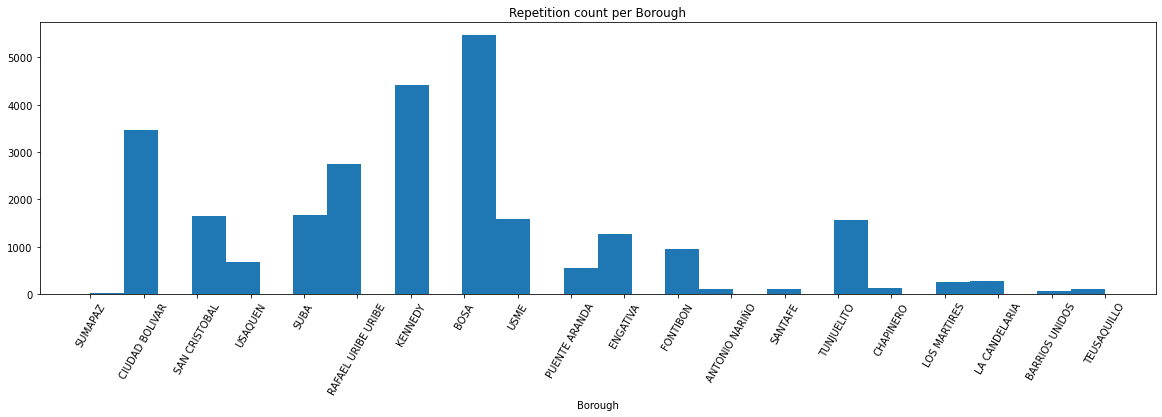

### Repitencia vs Grado 2020
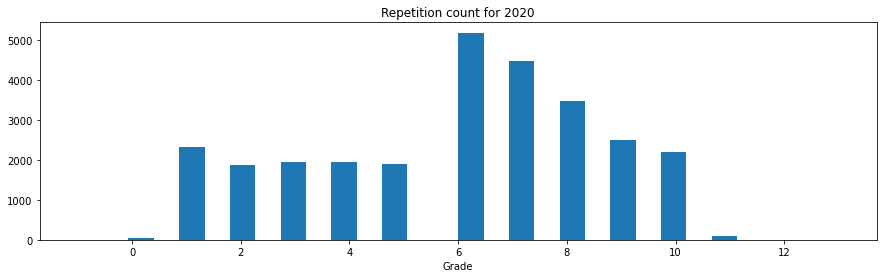

### Repitencia vs Grado 2021
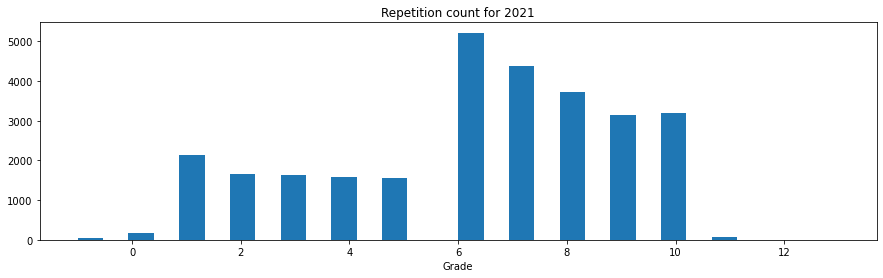

### Estrato

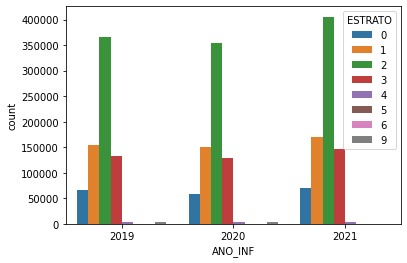

In [34]:
df_bar = df_anexo6A[["ANO_INF","ESTRATO"]].value_counts().reset_index()
df_bar = df_bar.reset_index()
df_bar.columns = ['index', 'ANO_INF', 'ESTRATO', 'count']
sns.barplot(y='count',x='ANO_INF',hue='ESTRATO',data=df_bar);

# **4. Posibles correlaciones entre variables**
---

Text(0, 0.5, 'Edad')

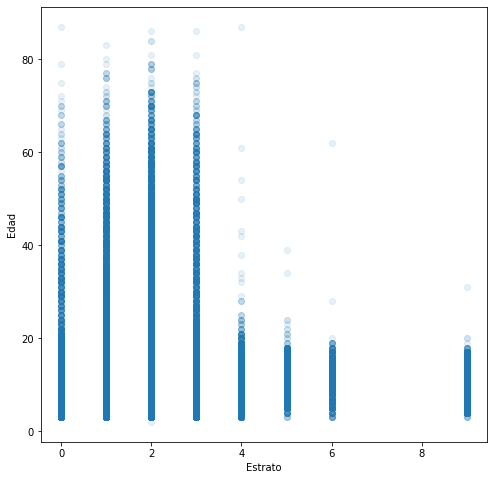

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(x=df_anexo6A["ESTRATO"], y=df_anexo6A["EDAD"], alpha= 0.1)
ax.set_xlabel('Estrato')
ax.set_ylabel('Edad')

REPITENTE,N,S
ESTRATO,,
0,185555,7862
1,456952,19581
2,1082986,43252
3,394692,13870
4,10987,300
5,1406,56
6,922,22
9,8123,98


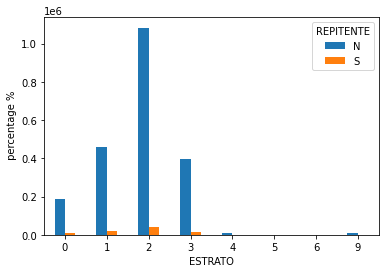

In [36]:
crosstab = pd.crosstab(index = df_anexo6A["ESTRATO"], columns = df_anexo6A["REPITENTE"])
barplot = crosstab.plot.bar(rot=0)
barplot.set_ylabel(" percentage %")
crosstab

In [40]:
def perform_chisq(series1, series2):
    """
    Perform a chi-square test between `series1` and `series2`
    and report the p-value and whether the difference is significant or not
    
    Arguments:
    series1, series2: Two pandas series (categorical data)
    
    Outputs:
    p: A number of type float, the p-value
    sig: A boolean; True if difference is significant, False otherwise
    """
    # YOUR CODE HERE
    
    series = pd.crosstab(series1,series2)
    
    sig = False
    
    p = chi2_contingency(series)[1]
    
    if p <= 0.05:
        sig = True
        
    p = float(p)
    sig = bool(sig)
        
    return p, sig
perform_chisq(df_anexo6A["ESTRATO"], df_anexo6A["REPITENTE"])

(2.728922831714496e-113, True)

**Conclusión: En base a lo anterior, las variables estrato y repitente son dependientes. **

# **5. Patrones y tendencias**
---

1. El grado que más repiten los niños es sexto(6). Le siguen todos los grados de secundaria. Algo de esperar, teniendo en cuenta el choque de cambio de primaria a secundaria
2. Vemos que en la localidad de Bosa y Kennedy los niños tienen una mayor tasa de repitencia.
3. Repitencia vs Localidad 2019: De acuerdo a la gráfica de repitencia por localidad en el año 2019, las localidades de Bosa, Kennedy, Ciudad Bolivar y Rafael Uribe Uribe son las cuatro localidades con una mayor cantidad de estudiantes repitentes
4. Repitencia vs Localidad 2021: De acuerdo a la gráfica de repitencia por localidad en el año 2021, las localidades de Kennedy, Bosa, Usme y San Cristóbal son las cuatro localidades con una mayor cantidad de estudiantes repitentes
5. Repitencia vs Localidad 2020: De acuerdo a la gráfica de repitencia por localidad en el año 2020 las localidades de Bosa, Ciudad Bolívar, Usme, Suba y Kennedy son las cinco localidades con una mayor cantidad de estudiantes repitentes
6. Repitencia (barras): La tendencia de estudiantes repitentes en los tres años esta al rededor del 3%; en el año 2019 el 3,72% son repitentes, en el año 2020 el 3,89% son repitentes y en el año 2021 el 3,83% son repitentes.
7. Estrato: En la gráfica se puede visualizar que el estrato de estudiantes matriculados más representativo es el dos, seguidamente del estrato uno y tres